In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import time

In [2]:
pd.set_option("display.max_columns", None)
pd.set_option("display.float", "{:.2f}".format)
warnings.filterwarnings(action='ignore')

In [3]:
# 한글폰트적용
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)
%config InlineBackend.figure_format = 'retina'

In [4]:
# 셀에서 값을 모두 출력
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Load dataset

In [5]:
data = pd.read_csv('Telco-Customer-Churn.csv')

In [6]:
data.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


# EDA

In [7]:
print('No. observations: {}\nNo. Columns: {}'.format(data.shape[0], data.shape[1]))

No. observations: 7043
No. Columns: 21


In [8]:
pd.DataFrame({
    'Data type':data.dtypes,
    'No. unique values':data.nunique(),
    'No. missing values':data.isna().sum()
})

,Data type,No. unique values,No. missing values
customerID,object,7043,0
gender,object,2,0
SeniorCitizen,int64,2,0
Partner,object,2,0
Dependents,object,2,0
tenure,int64,73,0
PhoneService,object,2,0
MultipleLines,object,3,0
InternetService,object,3,0
OnlineSecurity,object,3,0


변수들의 이름, 데이터 타입, 각 변수들의 고유 값의 개수, 결측치를 확인해 줍니다.

In [9]:
data[pd.to_numeric(data['TotalCharges'], errors='coerce').isna()][['TotalCharges']]

,TotalCharges
488,
753,
936,
1082,
1340,
3331,
3826,
4380,
5218,
6670,


TotalCharges 변수는 고유값의 개수가 6531개 임에도 데이터 타입은 문자열로 취급되어 있어 무엇 때문인지 알아본 결과, 몇몇 개체들이 제대로 된 값을 가지고 있지 않음을 확인할 수 있습니다.
이 값들은 결측치로 취급한 후 데이터 타입을 수치형으로 바꾸어 줍니다.

In [10]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

In [11]:
pd.DataFrame(data.isna().sum(), columns=['No. missing values'])

,No. missing values
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


11개의 새로운 결측치가 생겼습니다.

In [12]:
custid = ['customerID']
target = ['Churn']

# 범주형 변수
cat_cols = data.nunique()[data.nunique() < 10].keys().tolist()
cat_cols.remove(target[0])

# 수치형 변수
num_cols = [col for col in data.columns if col not in custid + target + cat_cols]

변수를 타겟 변수, 범주형 변수, 수치형 변수 등으로 구분지어 줍니다.

In [13]:
print('Distribution of the target variable of the data set')
data['Churn'].value_counts()

Distribution of the target variable of the data set


No     5174
Yes    1869
Name: Churn, dtype: int64

Distribution of the target variable of the data set


No     5174
Yes    1869
Name: Churn, dtype: int64

------------------------------------------------


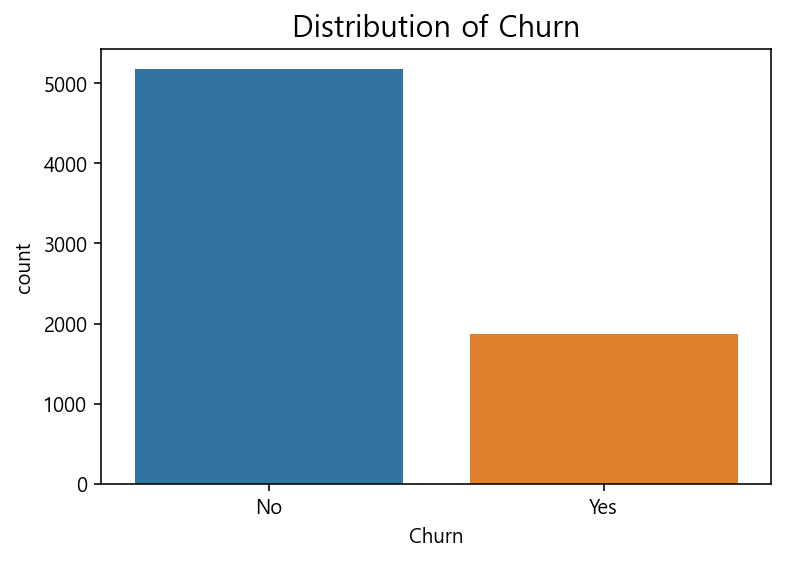

In [14]:
print('Distribution of the target variable of the data set')
data['Churn'].value_counts()
print('------------------------------------------------')

_ = sns.countplot(x='Churn', data=data)
_ = plt.title('Distribution of Churn', fontdict={'fontsize':15})

타겟변수의 분포를 확인해 본 결과 No가 Yes보다 많지만 데이터 불균형을 신경쓸 정도는 아니라 생각됩니다.

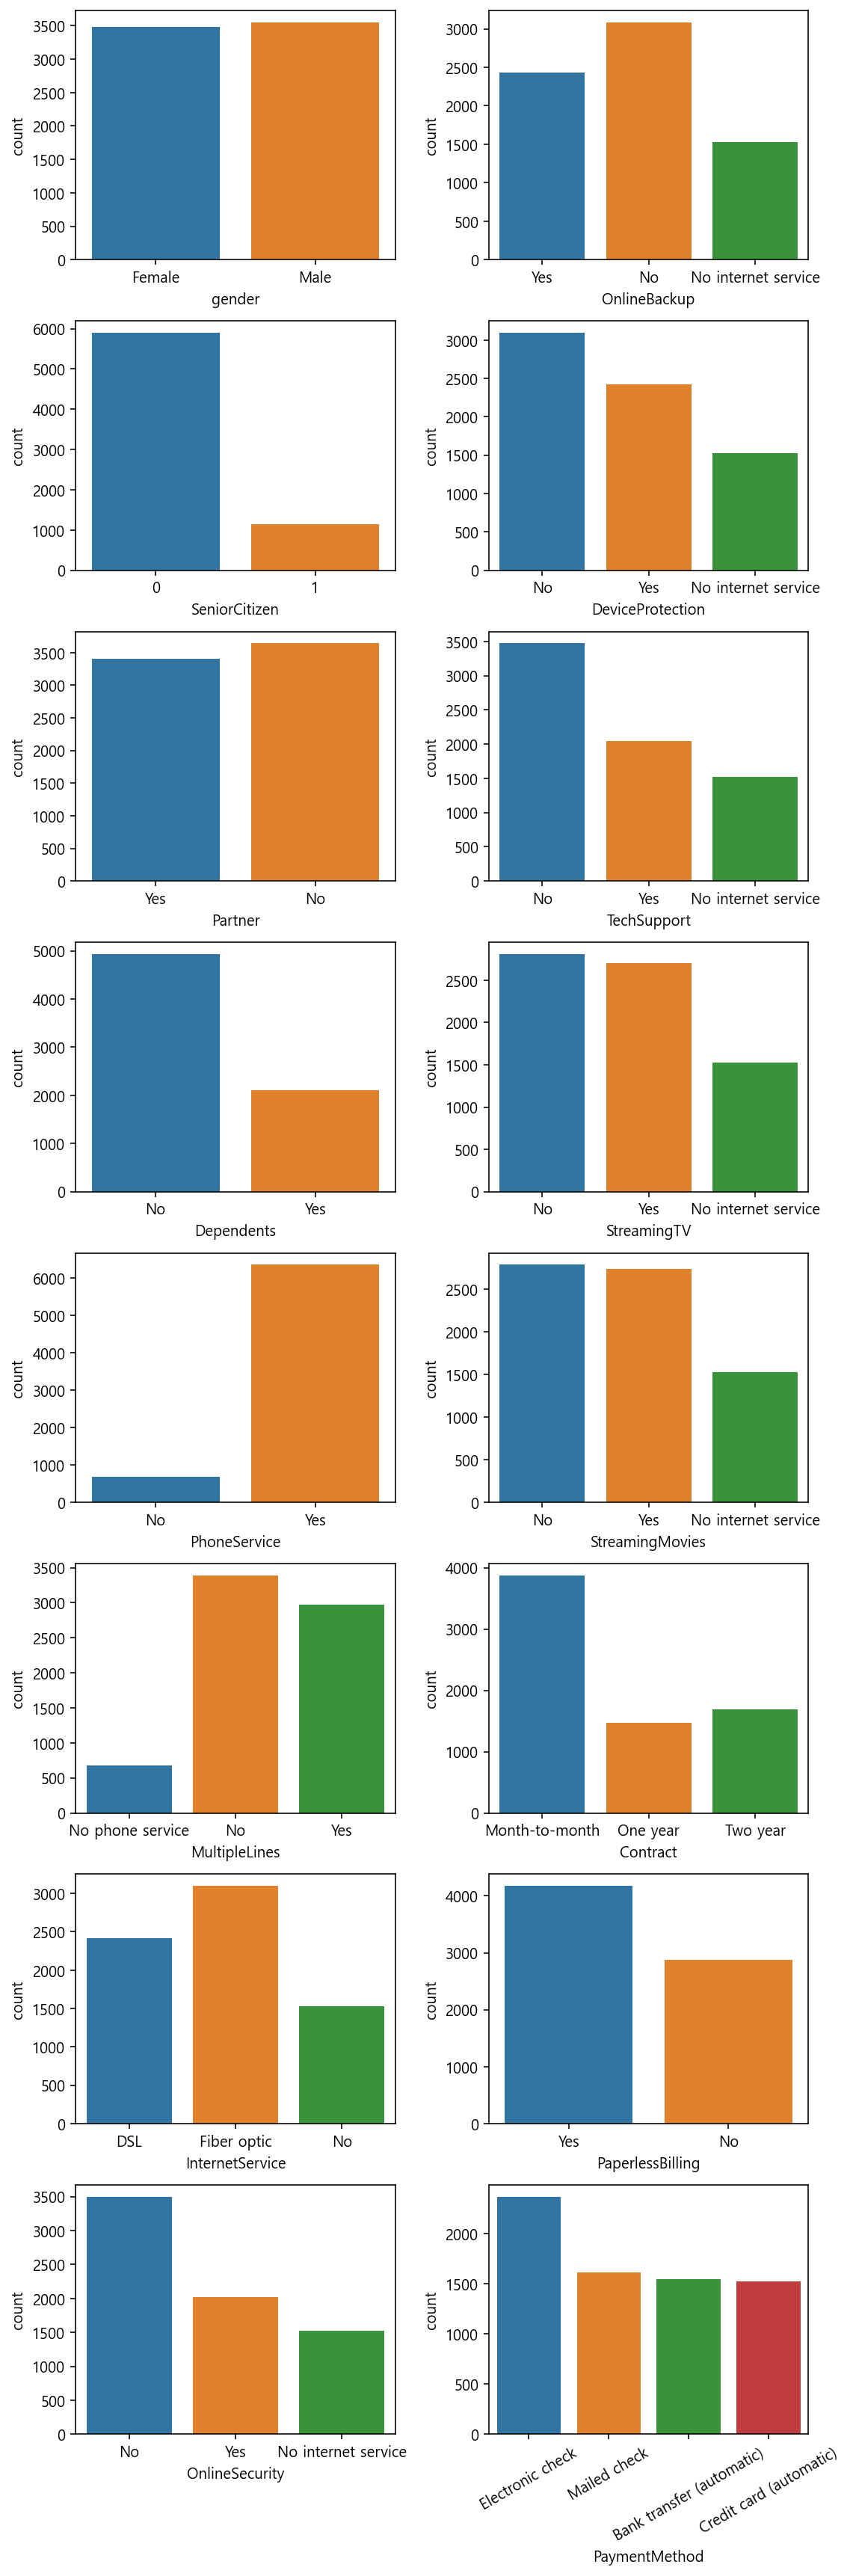

In [15]:
fig, axes = plt.subplots(8, 2, figsize = (8, 3*8))

for ind, col in enumerate(cat_cols):
    _ = sns.countplot(x=col, data=data, ax=axes[np.where(ind < 8, ind, ind-8), np.where(ind < 8, 0, 1)])
    _ = plt.xticks(rotation=30)
    
fig.tight_layout()

범주형 변수의 분포 형태를 알아보았습니다.

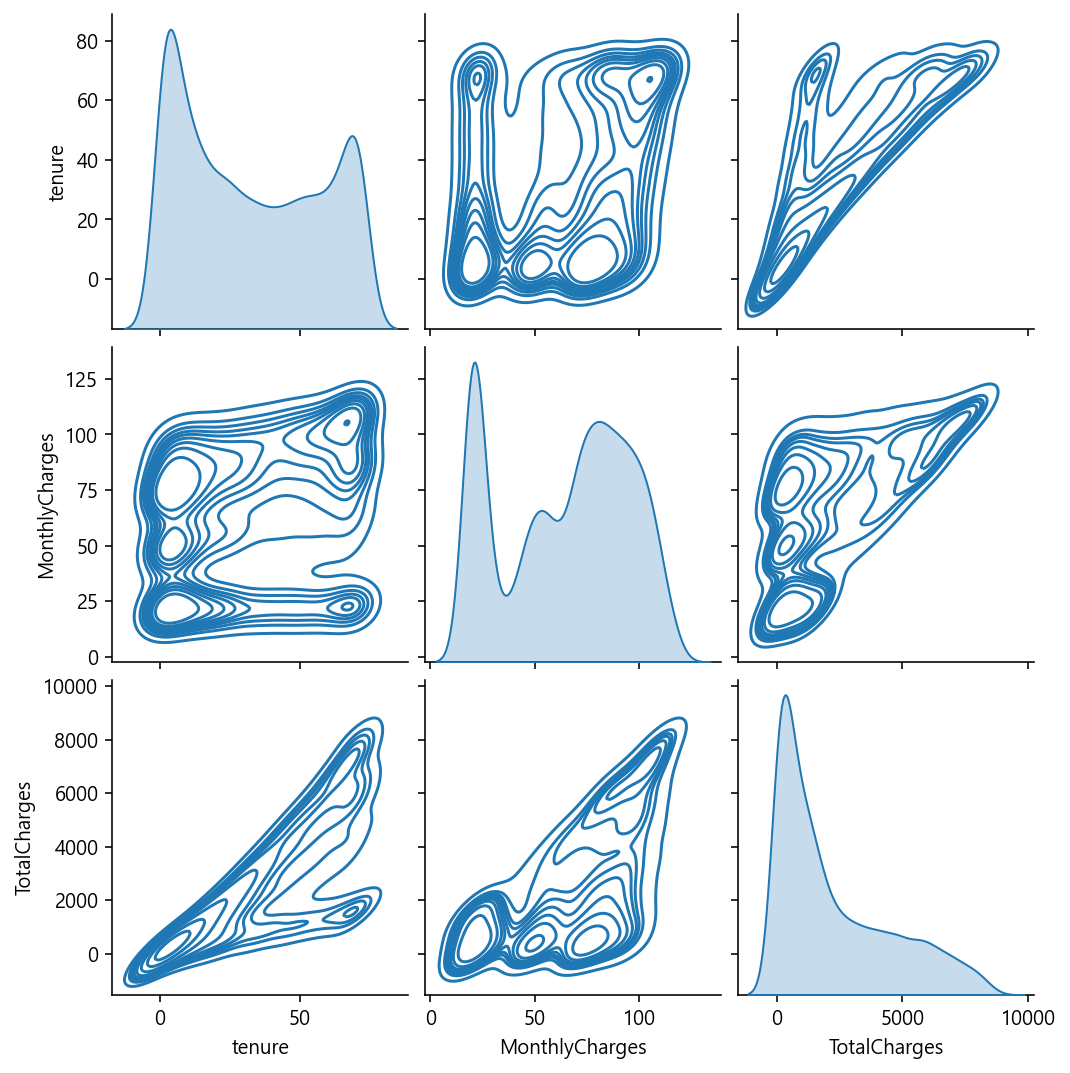

In [16]:
_ = sns.pairplot(data[num_cols], kind='kde')

수치형 변수들의 히스토그램과 Scatter plot을 통해 변수간 관계를 알아보았습니다. 변수 TotalCharges는 다른 변수들과 상관관계가 높은 것으로 보입니다.

<AxesSubplot:>

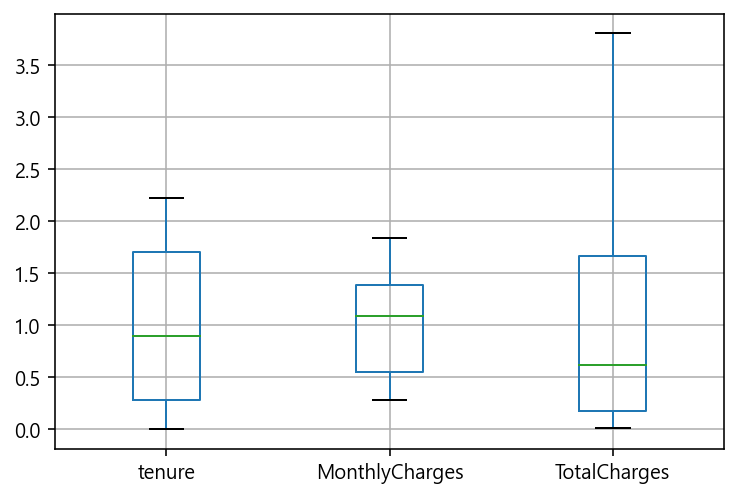

In [17]:
# 데이터 세트 정규화
normalized = data / data.mean()
normalized[num_cols].boxplot()

박스플롯을 통해 정규화 된 수치형 변수들의 분포를 확인합니다.

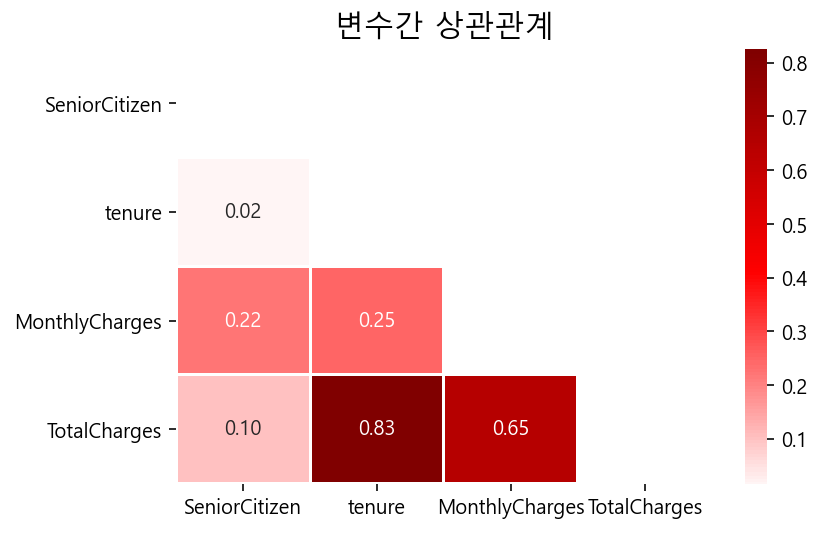

In [18]:
# 변수간 상관관계
corr = data.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))
_ = sns.heatmap(corr,
           mask = mask,
           annot = True,
           cmap = "seismic",
           center = 0,
           fmt = '.2f',
           linewidths=1)
_ = plt.title('변수간 상관관계', fontdict={'fontsize':15})

상관관계가 높은 변수들
>TotalCharges & tenure (0.83) <br>
TotalCharges & MonthlyCharges (0.65)

<br>
변수 TotalCharges는 다른 변수들과 높은 상관관계를 가져 다중공선성이 의심되므로 나중에 제거하도록 합니다.

# Feature engineering

In [19]:
data_mod = data.drop('TotalCharges', axis=1)
num_cols.remove('TotalCharges')

TotalCharges 변수를 제거하였습니다.

In [20]:
# 결측치 재확인
data_mod.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
Churn               0
dtype: int64

앞 전에 결측치를 가지고 있었던 TotalCharges 변수를 제거해 주어 데이터세트에는 더 이상 결측치를 가지고 있는 변수는 없습니다.

In [21]:
def ordinal_3(col):
    return np.where(col == 'Yes', 2, np.where(col == 'No', 1, 0))

In [22]:
# Ordinal encoding
ordinal3_cols =['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'PaperlessBilling']

for col in ordinal3_cols:
    data_mod[col] = data_mod[col].apply(ordinal_3)

In [23]:
data_mod['gender'] = np.where(data_mod['gender'] == 'Female', 1, 0)
data_mod['Churn'] = np.where(data_mod['Churn'] == 'Yes', 1, 0)

In [24]:
data_dummies = pd.get_dummies(data_mod, columns=[col for col in cat_cols if col not in ordinal3_cols + ['gender', 'SeniorCitizen']], drop_first=True)

범주형 변수들 중 순서형 변수들은 Ordinal encoding을, 이외의 변수들은 One-hot encoding을 실행 하였습니다.

In [25]:
from sklearn.model_selection import train_test_split
X = data_dummies.drop(target + custid, axis=1)
y = data_dummies[target[0]]

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, stratify=y, random_state=802)

데이터를 Train set와 Test set으로 7:3 층화추출을 통해 분할하였습니다.

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

train_X_std = scaler.fit_transform(train_X)
test_X_std = scaler.transform(test_X)

변수들을 표준화하였습니다.

## 모델링

In [27]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score

def print_score(actual, pred, prob, split_set):
    print(f"\n{split_set} set modeling Result:")
    print("================================================")
    print(confusion_matrix(actual, pred))
    print(f"\nAccuracy Score: {round(accuracy_score(actual, pred), 5)*100}%")
    
    print(f"AUC Score: {round(roc_auc_score(actual, prob), 5)}")
    print("-----------------------------------------------")
    print(classification_report(actual, pred))
    print("-----------------------------------------------")

### 로지스틱 회귀모형

In [28]:
from sklearn.linear_model import LogisticRegressionCV
logistic = LogisticRegressionCV()

logistic.fit(train_X_std, train_y)

print('Model accuracy: ', round(accuracy_score(test_y, logistic.predict(test_X_std)), 3))

LogisticRegressionCV()

Model accuracy:  0.799


In [29]:
print_score(train_y, logistic.predict(train_X_std), logistic.predict_proba(train_X_std)[:, 1], 'Train')


Train set modeling Result:
[[3259  363]
 [ 603  705]]

Accuracy Score: 80.406%
AUC Score: 0.84697
-----------------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      3622
           1       0.66      0.54      0.59      1308

    accuracy                           0.80      4930
   macro avg       0.75      0.72      0.73      4930
weighted avg       0.80      0.80      0.80      4930

-----------------------------------------------


In [30]:
print_score(test_y, logistic.predict(test_X_std), logistic.predict_proba(test_X_std)[:, 1], 'Test')


Test set modeling Result:
[[1387  165]
 [ 260  301]]

Accuracy Score: 79.886%
AUC Score: 0.84333
-----------------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1552
           1       0.65      0.54      0.59       561

    accuracy                           0.80      2113
   macro avg       0.74      0.72      0.73      2113
weighted avg       0.79      0.80      0.79      2113

-----------------------------------------------


### XGBoost

In [31]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

xgboost = xgb.XGBClassifier(verbosity=0, learning_rate=0.01, n_estimators=500, subsample=0.7, colsample_bytree=0.7, n_jobs=-1)
xgb_params = {'max_depth':[3, 5],
             'gamma':[0, 5],
             'min_child_weight':[3, 5]}
xgb_grid = GridSearchCV(estimator=xgboost, param_grid=xgb_params, cv=3, scoring='roc_auc', verbose=0)

t0 = time.time()
xgb_grid.fit(train_X_std, train_y)
t1 = time.time()
print(f"모델링 소요시간: {t1-t0:.2f}초")

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.7, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.01, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=500, n_jobs=-1,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=0.7,
                                     tree_method=None, val

모델링 소요시간: 43.14초


In [32]:
xgb_best = xgb_grid.best_estimator_

In [33]:
print_score(train_y, xgb_best.predict(train_X_std), xgb_best.predict_proba(train_X_std)[:, 1], 'Train')


Train set modeling Result:
[[3328  294]
 [ 647  661]]

Accuracy Score: 80.913%
AUC Score: 0.85859
-----------------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      3622
           1       0.69      0.51      0.58      1308

    accuracy                           0.81      4930
   macro avg       0.76      0.71      0.73      4930
weighted avg       0.80      0.81      0.80      4930

-----------------------------------------------


In [34]:
print_score(test_y, xgb_best.predict(test_X_std), xgb_best.predict_proba(test_X_std)[:, 1], 'Test')


Test set modeling Result:
[[1407  145]
 [ 267  294]]

Accuracy Score: 80.502%
AUC Score: 0.85051
-----------------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1552
           1       0.67      0.52      0.59       561

    accuracy                           0.81      2113
   macro avg       0.76      0.72      0.73      2113
weighted avg       0.80      0.81      0.80      2113

-----------------------------------------------


## 결과 탐색

### 로지스틱 회귀계수

In [35]:
coefficients = pd.DataFrame(np.transpose(logistic.coef_), index=X.columns, columns=['Coefficient(Logit)'])

# Logit -> Odds
coefficients['Exp_coefficient(Odds)'] = np.exp(coefficients['Coefficient(Logit)'])

# Logit 절대값 크기순 정렬
coeff_sort = coefficients['Coefficient(Logit)'].abs().sort_values(ascending=False).keys()
coefficients.loc[coeff_sort][:10]

,Coefficient(Logit),Exp_coefficient(Odds)
tenure,-0.78,0.46
Contract_Two year,-0.58,0.56
InternetService_Fiber optic,0.41,1.50
StreamingMovies_No internet service,-0.29,0.75
InternetService_No,-0.29,0.75
Contract_One year,-0.26,0.77
TechSupport,-0.25,0.78
OnlineSecurity,-0.25,0.78
PhoneService,-0.23,0.79
StreamingTV,0.21,1.24


### Feature importances of XGBoost

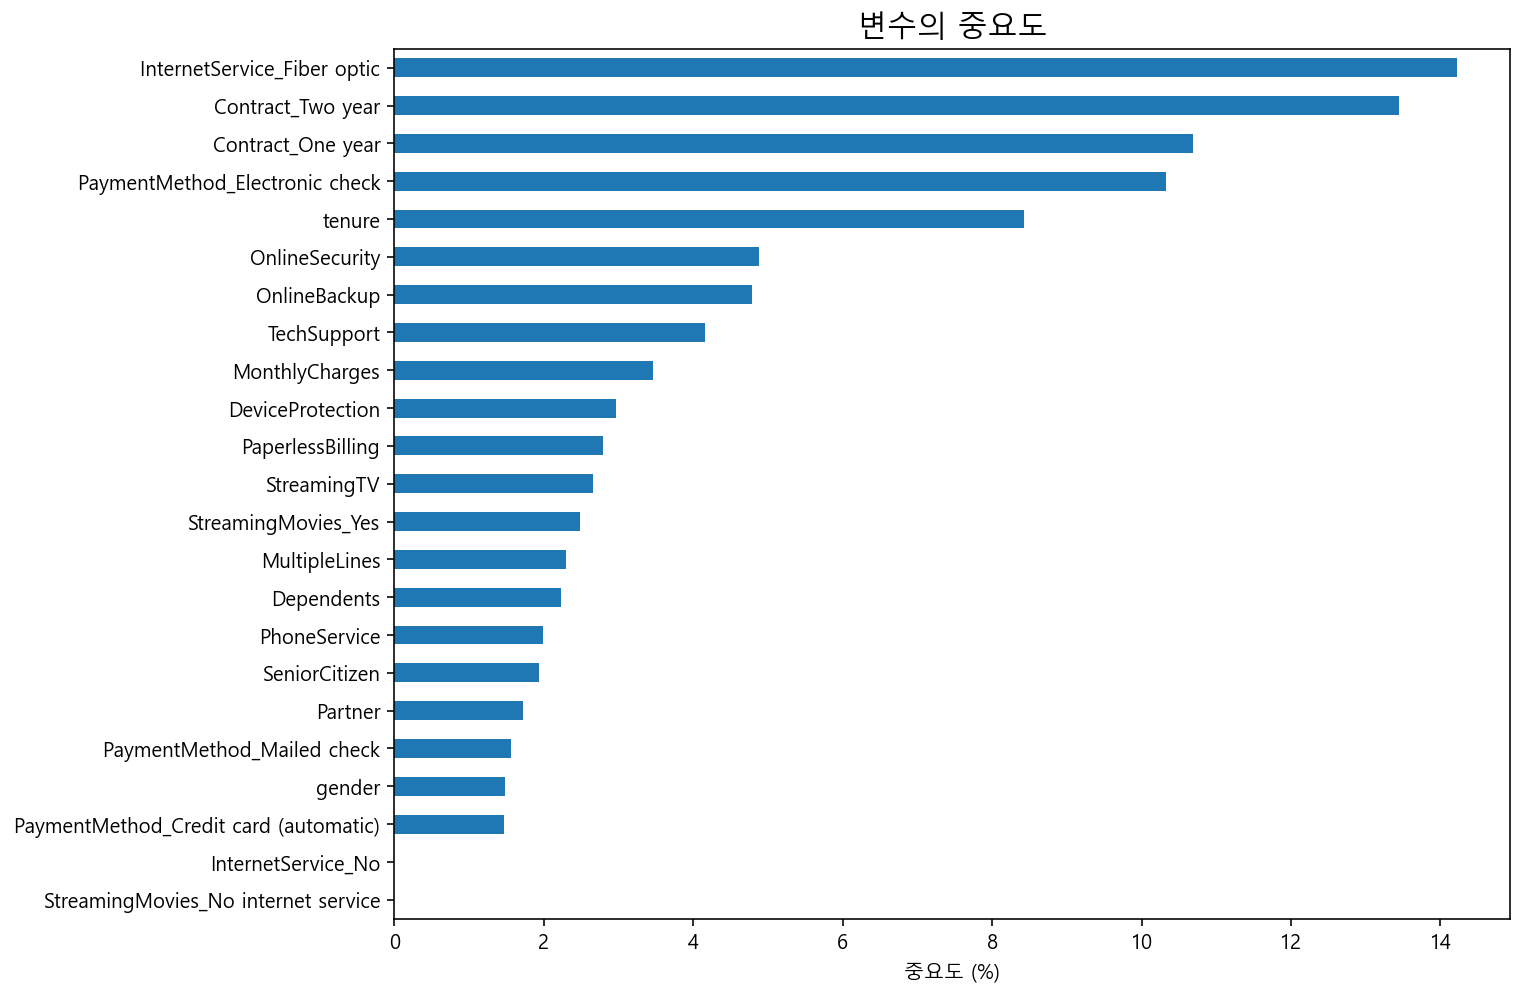

In [36]:
importance_xgb = pd.Series(xgb_best.feature_importances_*100, index=train_X.columns).sort_values()

_ = plt.figure(figsize = (10, 8))
_ = importance_xgb.plot(kind='barh')
_ = plt.title("변수의 중요도", fontdict={'fontsize':15})
_ = plt.xlabel('중요도 (%)')

In [37]:
logistic_high = coeff_sort[:5]
xgb_high = importance_xgb[-5:].keys()

important_cols = list(set(logistic_high).intersection(xgb_high))
important_cols

['InternetService_Fiber optic', 'tenure', 'Contract_Two year']

In [38]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


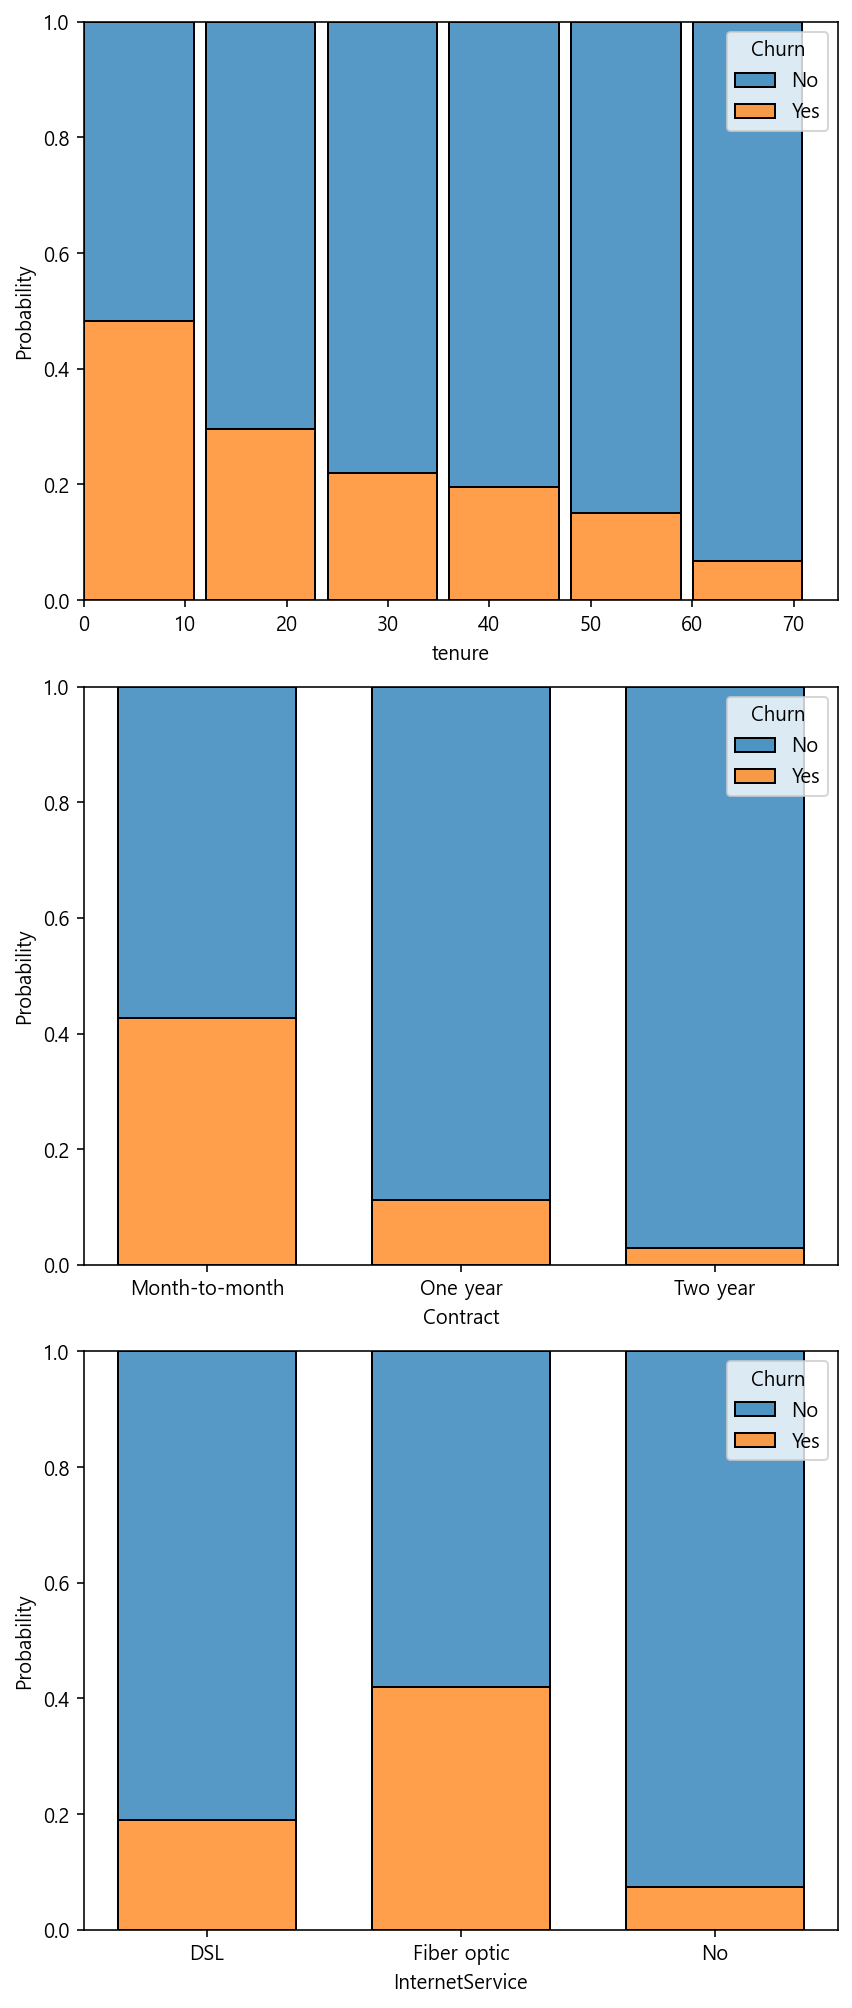

In [39]:
fig, ax = plt.subplots(3, 1, figsize=(6, 14))

_ = sns.histplot(x='tenure', hue='Churn', data=data, stat='probability', multiple='fill', shrink=.9, ax=ax[0], bins=6)
_ = sns.histplot(x='Contract', hue='Churn', data=data, stat='probability', multiple='fill', shrink=.7, ax=ax[1])
_ = sns.histplot(x='InternetService', hue='Churn', data=data, stat='probability', multiple='fill', shrink=.7, ax=ax[2])

fig.tight_layout()

In [40]:
from sklearn.manifold import TSNE

X_std = scaler.transform(X)
tsne = TSNE(learning_rate=100)
data_tsne = tsne.fit_transform(X_std)
xs = data_tsne[:, 0]
ys = data_tsne[:, 1]

<AxesSubplot:>

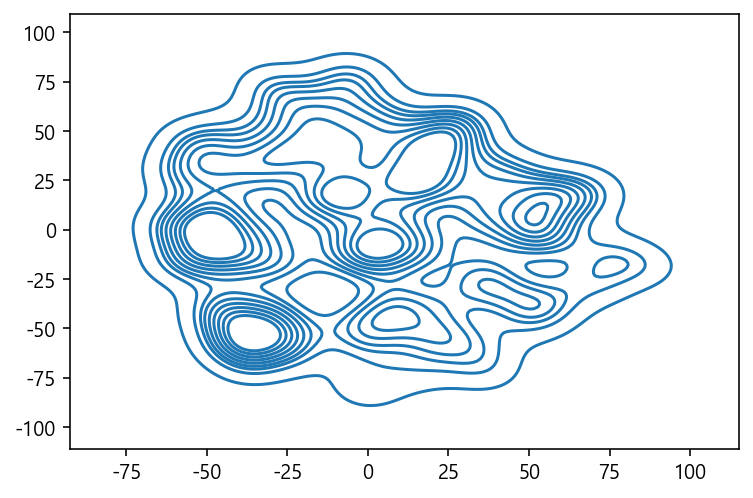

In [41]:
sns.kdeplot(xs, ys)

KMeans(n_clusters=1, n_jobs=-1, random_state=802)

KMeans(n_clusters=2, n_jobs=-1, random_state=802)

KMeans(n_clusters=3, n_jobs=-1, random_state=802)

KMeans(n_clusters=4, n_jobs=-1, random_state=802)

KMeans(n_clusters=5, n_jobs=-1, random_state=802)

KMeans(n_clusters=6, n_jobs=-1, random_state=802)

KMeans(n_clusters=7, n_jobs=-1, random_state=802)

KMeans(n_jobs=-1, random_state=802)

KMeans(n_clusters=9, n_jobs=-1, random_state=802)

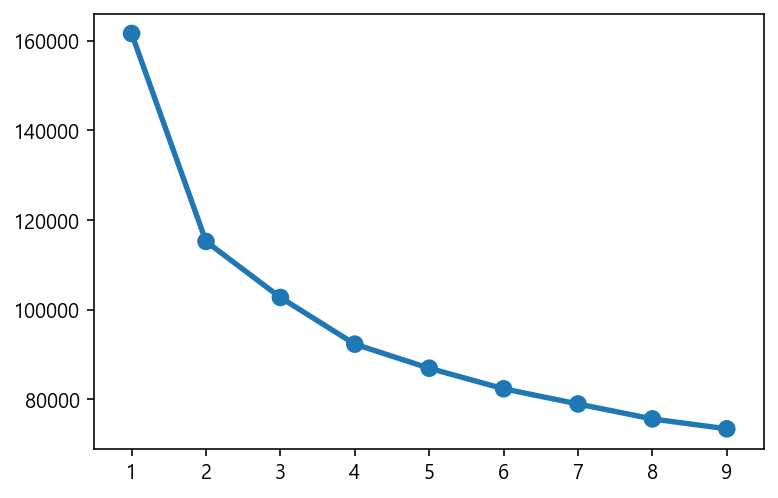

In [42]:
# K평균 군집분석
from sklearn.cluster import KMeans

sse = {}
for k in range(1, 10):
    km = KMeans(n_clusters=k, random_state=802, n_jobs=-1)
    km.fit(X_std)
    sse[k] = km.inertia_
    
_ = sns.pointplot(x=list(sse.keys()), y=list(sse.values()))

In [43]:
# Number of clusters = 4
km4 = KMeans(n_clusters=4, random_state=802)
km4.fit(X_std)

KMeans(n_clusters=4, random_state=802)

In [44]:
km4_labels = np.where(km4.labels_ == 0, 'G1',
                     np.where(km4.labels_ == 1, 'G2',
                             np.where(km4.labels_ ==2, 'G3', 'G4')))

<AxesSubplot:>

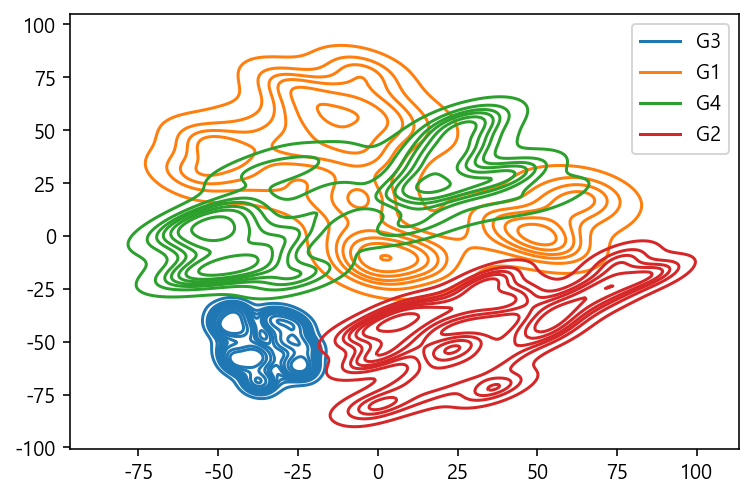

In [45]:
sns.kdeplot(xs, ys, hue=km4_labels)

In [46]:
X = pd.get_dummies(data_mod.drop(target + custid, axis=1))

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [47]:
groupby_segment = pd.DataFrame(X_std, columns=X.columns).assign(segment = km4.labels_, Churn=y)\
    .replace({'segment':{0:'G1', 3:'G2', 1:'G3', 2:'G4'}})\
    .groupby('segment').mean()

groupby_segment = groupby_segment[['Churn'] + importance_xgb.sort_values(ascending=False).index.tolist()]
groupby_segment.T

segment,G1,G2,G3,G4
Churn,0.48,0.14,0.07,0.25
InternetService_Fiber optic,0.48,0.31,-0.89,-0.89
Contract_Two year,-0.55,0.40,0.42,-0.01
Contract_One year,-0.39,0.44,0.07,0.01
PaymentMethod_Electronic check,0.51,-0.25,-0.54,-0.01
tenure,-0.66,0.90,-0.07,-0.03
OnlineSecurity,0.18,0.70,-1.52,0.49
OnlineBackup,0.19,0.72,-1.53,0.40
TechSupport,0.14,0.74,-1.52,0.49
MonthlyCharges,0.35,0.84,-1.45,-0.76


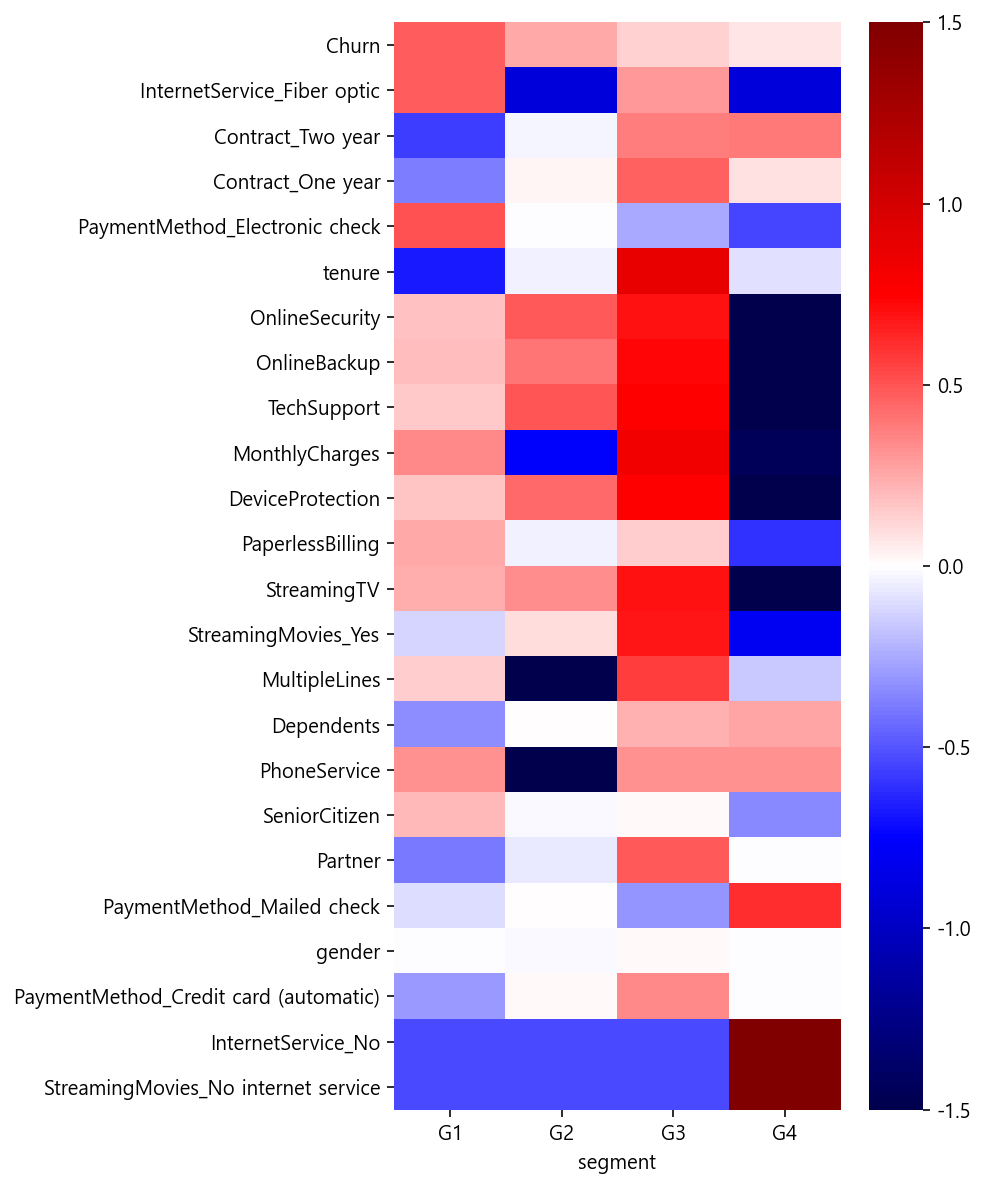

In [122]:
plt.figure(figsize = (5, 10))
_=sns.heatmap(groupby_segment.T, cmap='seismic', center=0, vmax=1.5, vmin=-1.5)

자녀나 배우자가 없는 1인가구 일수록, 서비스 이용기간이 짧을수록 서비스 이탈율이 높았으며, 모바일, 인터넷, 영화 스트리밍 서비스 등 다양한 서비스를 복합적으로 사용하는 가구일수록 서비스 이탈율이 낮은 것을 알 수 있습니다.
또한 다른 서비스는 사용하지 않고 오로지 모바일 서비스만 이용하며 월 청구 요금이 가장 낮은 G4 그룹의 경우 이탈율이 이례적으로 가장 낮음을 알 수 있습니다.